In [1]:
# imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import colormaps as cmaps # for scientific colourmaps

* Plots one objective on x-axis against another objective on the y-axis for each candidate medium.
* Each dot is colour-coded according to the batch it resulted from.
* Plots Pareto front deduced from data.
* The performance of the baseline medium is plotted onto the graph as black cross to allow for visual performance comparison
* If desired, filters out the medium compositions which lead to no or very low growth
* Saves the figure as png file

In [3]:
data_1 = pd.read_csv("../data/SuppFigure1.csv")
data_2 = pd.read_csv("../data/SuppFigure2.csv")
data_3 = pd.read_csv("../data/SuppFigure3.csv")
data_4 = pd.read_csv("../data/SuppFigure4.csv")

### Supplementary 1 - Growth-Production

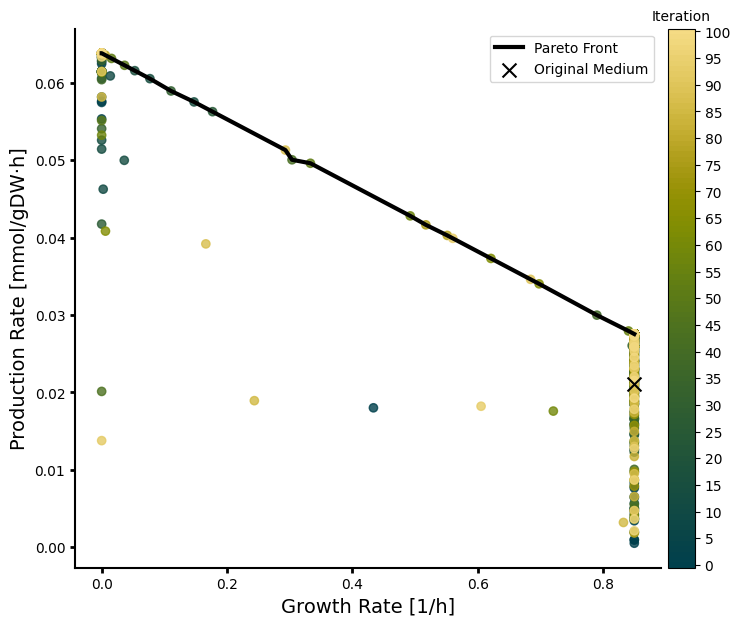

In [4]:
"Same plot but filtering out all entries where the growth rate is zero"
# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data_1["n_start"][0]
n_batch = data_1["n_batch"][0]
n_candidates = data_1["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data_1), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch

# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)


"""FILTERING STEP"""
# filter out all entries where the growth rate is above a certain threshold
data_growth_filtered = data_1[data_1["growth_rate"] > 0.000]
data_production_filtered = data_growth_filtered[data_growth_filtered["production"] > 0.000]


 # Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(x = data_production_filtered["growth_rate"], y = data_production_filtered["production"], 
                  c = point_colours[data_production_filtered.index], alpha = 0.8)


# Extract and sort Pareto points by growth rate
pareto_data = data_production_filtered[data_production_filtered["is_pareto"] == True].sort_values(by = "growth_rate")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["growth_rate"],
    pareto_data["production"],
    label = "Pareto Front",
    color = "black",
    linewidth = 3
)

# plot performance of initial medium
axes.scatter(
    x = data_1["init_growth_rate"][0],
    y = data_1["init_production"][0],
    color = "black", marker = "x", 
    label = "Original Medium", s = 100, zorder = 5
    )


# axes
axes.set_xlabel("Growth Rate [1/h]", fontsize = 14)
axes.set_ylabel("Production Rate [mmol/gDW·h]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("../figs/SuppFigure1.png", dpi = 300, bbox_inches = None)

### Supplementary 2 - Growth-Cost

/var/folders/fz/1kd077v55dz4fd956zt4jrc40000gn/T/ipykernel_41071/3582863349.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["cost"] = data_filtered["cost"] * 1e-3


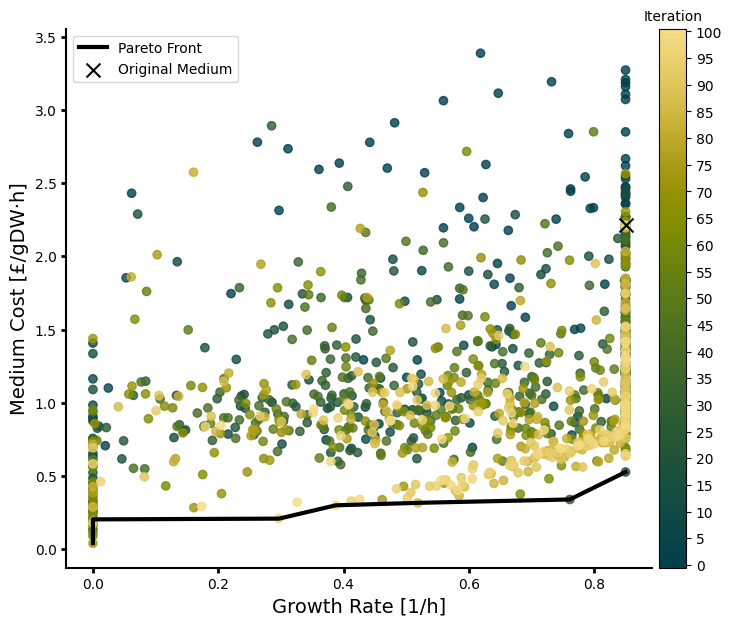

In [5]:
"Same plot but filtering out all entries where the growth rate is zero"
# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data_2["n_start"][0]
n_batch = data_2["n_batch"][0]
n_candidates = data_2["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data_2), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch

# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)


"""FILTERING STEP"""
# filter out all entries where the growth rate is above a certain threshold
data_filtered = data_2[data_2["growth_rate"] > 0.0]

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data_filtered["cost"] = data_filtered["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(x = data_filtered["growth_rate"], y = data_filtered["cost"], 
                  c = point_colours[data_filtered.index], alpha = 0.8)


# Extract and sort Pareto points by growth rate
pareto_data = data_filtered[data_filtered["is_pareto"] == True].sort_values(by = "growth_rate")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["growth_rate"],
    pareto_data["cost"],
    label = "Pareto Front",
    color = "black",
    linewidth = 3
)

# plot performance of initial medium
axes.scatter(
    x = data_2["init_growth_rate"][0],
    y = data_2["init_cost"][0] * 1e-3,
    color = "black", marker = "x", 
    label = "Original Medium", s = 100, zorder = 5
    )


# axes
axes.set_xlabel("Growth Rate [1/h]", fontsize = 14)
axes.set_ylabel("Medium Cost [£/gDW·h]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("../figs/SuppFigure2.png", dpi = 300, bbox_inches = None)

### Supplementary 3 - Production-Cost

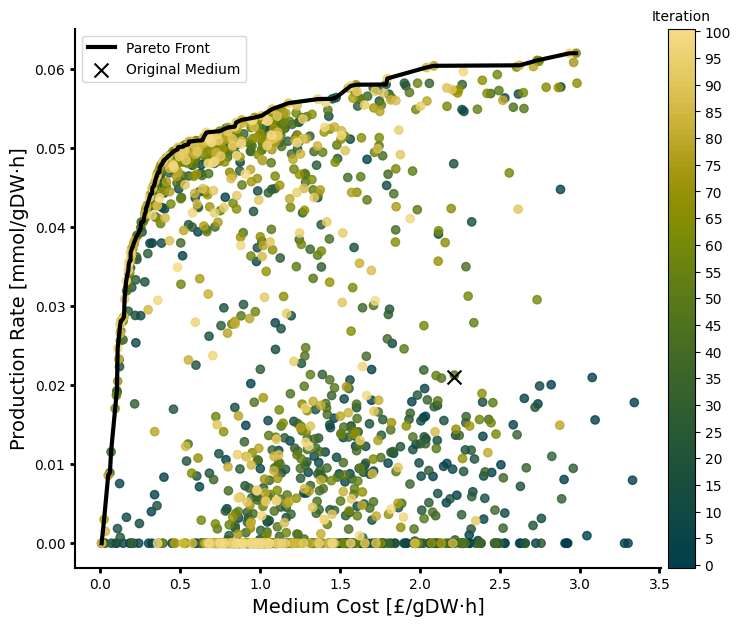

In [6]:
"Same plot but filtering out all entries where the growth rate is zero"
# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data_3["n_start"][0]
n_batch = data_3["n_batch"][0]
n_candidates = data_3["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data_3), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch

# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)


"""FILTERING STEP"""
# filter out all entries where the  rate is roduction a certain threshold
data_filtered = data_3[data_3["production"] >= 0.0]

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data_filtered["cost"] = data_filtered["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(x = data_filtered["cost"], y = data_filtered["production"], 
                  c = point_colours[data_filtered.index], alpha = 0.8)


# Extract and sort Pareto points by growth rate
pareto_data = data_filtered[data_filtered["is_pareto"] == True].sort_values(by = "production")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["cost"],
    pareto_data["production"],
    label = "Pareto Front",
    color = "black",
    linewidth = 3
)

# plot performance of initial medium
axes.scatter(
    x = data_3["init_cost"][0] * 1e-3,
    y = data_3["init_production"][0],
    color = "black", marker = "x", 
    label = "Original Medium", s = 100, zorder = 5
    )


# axes
axes.set_xlabel("Medium Cost [£/gDW·h]", fontsize = 14)
axes.set_ylabel("Production Rate [mmol/gDW·h]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("../figs/SuppFigure3.png", dpi = 300, bbox_inches = None)

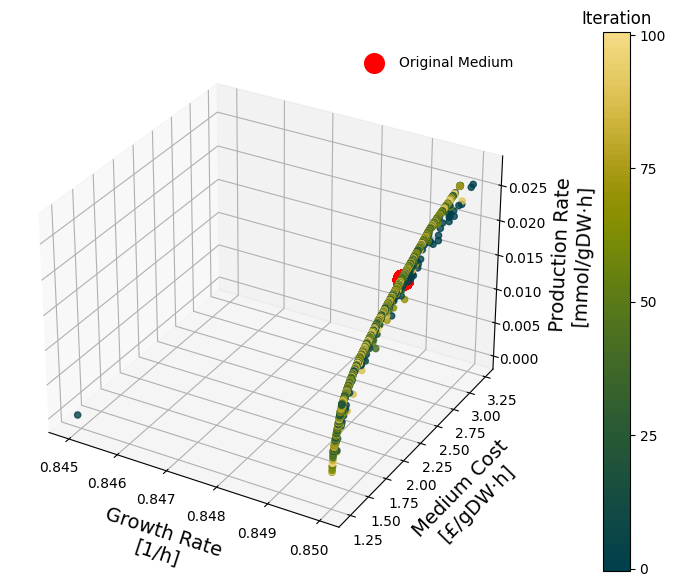

In [9]:
#data = pd.read_csv("../data/Figure3B.csv")
data = pd.read_csv("../data/SuppFigure4.csv")
figname = "../figs/SuppFigure4.png"
# figname = "SuppFigure4.png"

# Create the plot with given size
fig = plt.figure(figsize = (9, 7))
axes = fig.add_subplot(projection = '3d')

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data["n_start"][0]
n_batch = data["n_batch"][0]
n_candidates = data["n_candidates"][0]

"""
print("\nn_start = ", n_start, 
      "\nn_batch = ", n_batch, 
      "\nn_candidates = ", n_candidates,
      "\nlength = ", n_start + n_batch * n_candidates,
      "\nlen(data) = ", len(data))
"""

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch
# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data["cost"] = data["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)    
axes.scatter(
    data["growth_rate"],
    data["cost"],
    data["production"],
    c = point_colours, alpha = 0.8, zorder=1)


# axes
axes.set_xlabel("Growth Rate\n[1/h]", fontsize = 14, labelpad = 12)
axes.set_ylabel("Medium Cost\n[£/gDW·h]", fontsize = 14, labelpad = 12)
axes.set_zlabel("Production Rate\n[mmol/gDW·h]", fontsize = 14, labelpad = 12)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.zaxis.set_tick_params(width = 2, labelsize = 10)
"""
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)
"""
# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.11) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 12)
cbar.ax.set_yticks([0, 25, 50, 75, 100])
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries

# Plot original medium for comparison
axes.scatter(
    data["init_growth_rate"][0],
    data["init_cost"][0] * 1e-3,
    data["init_production"],
    color = "red", marker = "o", 
    label = "Original Medium", s = 200, zorder = 5000
    )

# Display the legend
axes.legend()
axes.legend(edgecolor = "none", frameon = False, fontsize=10)
# axes.view_init(azim=90, elev = 5)

# Show the plot
plt.show()

# fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig(figname, dpi = 300, bbox_inches = None)